## Modules to be installed in conda

1. ``networkx`` 
2. ``matplotlib``

Command line:

        conda install matplotlib networkx



In [1]:
# %conda install matplotlib

In [2]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


## Campus map graph

In [4]:
buildings = ['Delta6',
             'Hospital',
             'Block11A',
             'Block11E',
             'Coppito2',
             'Coppito1',
             'Block0',
             'StudentCenter',
             'Lab',
             'ComputerCenter']

In [5]:
G = nx.Graph()

In [6]:
G.nodes()

NodeView(())

In [7]:
G.edges()

EdgeView([])

In [8]:
G.add_nodes_from(buildings)

In [9]:
G.nodes

NodeView(('Delta6', 'Hospital', 'Block11A', 'Block11E', 'Coppito2', 'Coppito1', 'Block0', 'StudentCenter', 'Lab', 'ComputerCenter'))

In [10]:
G.edges

EdgeView([])

In [11]:
G.add_edge('Delta6','Hospital')
G.add_edge('Delta6','Block11A')

In [12]:
G.edges

EdgeView([('Delta6', 'Hospital'), ('Delta6', 'Block11A')])

In [13]:
G.add_edge('Block11A','Hospital')
G.add_edge('Block11E','Hospital')
G.add_edge('Block11E','Coppito2')
G.add_edge('Coppito1','Coppito2')
G.add_edge('StudentCenter','Coppito2')
G.add_edge('Coppito1','StudentCenter')
G.add_edge('StudentCenter','Lab')
G.add_edge('StudentCenter','Block0')
G.add_edge('Lab','ComputerCenter')
G.add_edge('ComputerCenter','StudentCenter')
G.add_edge('Coppito1','Block0')
G.add_edge('Block0','Lab')
G.add_edge('Lab','ComputerCenter')
G.add_edge('ComputerCenter','Block0')

print (G.number_of_edges())

15


In [14]:
G.nodes

NodeView(('Delta6', 'Hospital', 'Block11A', 'Block11E', 'Coppito2', 'Coppito1', 'Block0', 'StudentCenter', 'Lab', 'ComputerCenter'))

In [15]:
G.edges

EdgeView([('Delta6', 'Hospital'), ('Delta6', 'Block11A'), ('Hospital', 'Block11A'), ('Hospital', 'Block11E'), ('Block11E', 'Coppito2'), ('Coppito2', 'Coppito1'), ('Coppito2', 'StudentCenter'), ('Coppito1', 'StudentCenter'), ('Coppito1', 'Block0'), ('Block0', 'StudentCenter'), ('Block0', 'Lab'), ('Block0', 'ComputerCenter'), ('StudentCenter', 'Lab'), ('StudentCenter', 'ComputerCenter'), ('Lab', 'ComputerCenter')])

In [16]:
%matplotlib inline

In [17]:
pos = nx.spring_layout(G, k=1, seed=10)

In [18]:
pos

{'Delta6': array([-0.07509172, -1.        ]),
 'Hospital': array([-0.28234298, -0.52647204]),
 'Block11A': array([-0.35528857, -0.94072138]),
 'Block11E': array([-0.58986166, -0.11435901]),
 'Coppito2': array([-0.32836244,  0.34275659]),
 'Coppito1': array([-0.08210325,  0.65035294]),
 'Block0': array([0.27248336, 0.29336027]),
 'StudentCenter': array([0.2187272 , 0.53530193]),
 'Lab': array([0.58779835, 0.20640544]),
 'ComputerCenter': array([0.63404172, 0.55337525])}

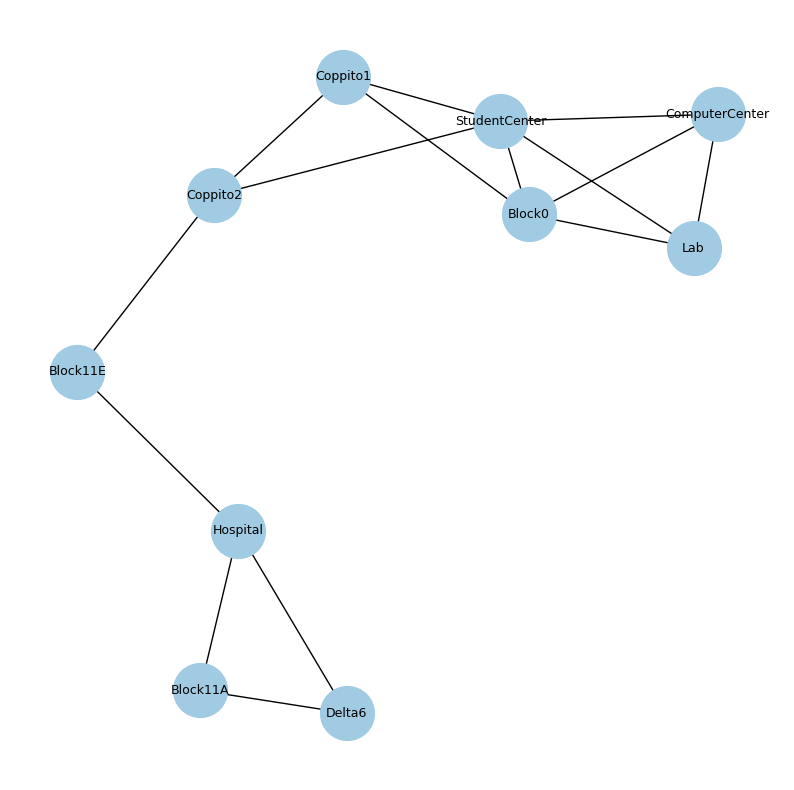

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

nx.draw(G,
        pos,
        ax,
        node_color='#A0CBE2',
        width=1,
        node_size=1500,
        with_labels=True,
        font_size=9,
        font_color='k')

plt.show()


In [20]:
# list neighbors to the node delta
list(G.neighbors('Delta6'))

['Hospital', 'Block11A']

In [21]:
G.nodes()

NodeView(('Delta6', 'Hospital', 'Block11A', 'Block11E', 'Coppito2', 'Coppito1', 'Block0', 'StudentCenter', 'Lab', 'ComputerCenter'))

In [22]:
subsets = dict()

for i in G.nodes():
    coverednodes = list(G.neighbors(i)) + [i] # coverednodes is the neighbors of the nodes in the graph + the node itself
    subsets[i] = coverednodes

subsets

{'Delta6': ['Hospital', 'Block11A', 'Delta6'],
 'Hospital': ['Delta6', 'Block11A', 'Block11E', 'Hospital'],
 'Block11A': ['Delta6', 'Hospital', 'Block11A'],
 'Block11E': ['Hospital', 'Coppito2', 'Block11E'],
 'Coppito2': ['Block11E', 'Coppito1', 'StudentCenter', 'Coppito2'],
 'Coppito1': ['Coppito2', 'StudentCenter', 'Block0', 'Coppito1'],
 'Block0': ['StudentCenter', 'Coppito1', 'Lab', 'ComputerCenter', 'Block0'],
 'StudentCenter': ['Coppito2',
  'Coppito1',
  'Lab',
  'Block0',
  'ComputerCenter',
  'StudentCenter'],
 'Lab': ['StudentCenter', 'ComputerCenter', 'Block0', 'Lab'],
 'ComputerCenter': ['Lab', 'StudentCenter', 'Block0', 'ComputerCenter']}

In [23]:
subsets = dict()

subsets = {i : list(G.neighbors(i)) + [i] for i in G.nodes()}

subsets

{'Delta6': ['Hospital', 'Block11A', 'Delta6'],
 'Hospital': ['Delta6', 'Block11A', 'Block11E', 'Hospital'],
 'Block11A': ['Delta6', 'Hospital', 'Block11A'],
 'Block11E': ['Hospital', 'Coppito2', 'Block11E'],
 'Coppito2': ['Block11E', 'Coppito1', 'StudentCenter', 'Coppito2'],
 'Coppito1': ['Coppito2', 'StudentCenter', 'Block0', 'Coppito1'],
 'Block0': ['StudentCenter', 'Coppito1', 'Lab', 'ComputerCenter', 'Block0'],
 'StudentCenter': ['Coppito2',
  'Coppito1',
  'Lab',
  'Block0',
  'ComputerCenter',
  'StudentCenter'],
 'Lab': ['StudentCenter', 'ComputerCenter', 'Block0', 'Lab'],
 'ComputerCenter': ['Lab', 'StudentCenter', 'Block0', 'ComputerCenter']}

\begin{array}{c|ccccccccc}
  & \texttt{Delta6} & \texttt{Hospital} & \texttt{Block11A} & \texttt{Block11E} & \texttt{Coppito2} 
  & \texttt{Coppito1} & \texttt{Block0} & \texttt{Lab} & \texttt{ComputerCenter} & \texttt{StudentCenter}\\
  \hline
\texttt{Delta6}   & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\texttt{Hospital} & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\texttt{Block11A} & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\texttt{Block11E} & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
\texttt{Coppito2} & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 1\\
\texttt{Coppito1} & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 1\\
\texttt{Block0}   & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1\\
\texttt{Lab}      & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
\texttt{ComputerCenter} & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
\texttt{StudentCenter} & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1\\
\end{array}}

## Decision variables



$$x_i = \begin{cases} 1 \text{ if subset } i \text { is selected (if the facility is opened on building $i$) }\\ 0 \text{ otherwise.}  \end{cases}$$

In [24]:
buildings

['Delta6',
 'Hospital',
 'Block11A',
 'Block11E',
 'Coppito2',
 'Coppito1',
 'Block0',
 'StudentCenter',
 'Lab',
 'ComputerCenter']

In [25]:
setcovering = gb.Model()

x = setcovering.addVars(buildings, 
                        vtype = gb.GRB.BINARY,
                        name = 'x')

setcovering.update()

x

Set parameter Username
Set parameter LicenseID to value 2627747
Academic license - for non-commercial use only - expires 2026-02-25


{'Delta6': <gurobi.Var x[Delta6]>,
 'Hospital': <gurobi.Var x[Hospital]>,
 'Block11A': <gurobi.Var x[Block11A]>,
 'Block11E': <gurobi.Var x[Block11E]>,
 'Coppito2': <gurobi.Var x[Coppito2]>,
 'Coppito1': <gurobi.Var x[Coppito1]>,
 'Block0': <gurobi.Var x[Block0]>,
 'StudentCenter': <gurobi.Var x[StudentCenter]>,
 'Lab': <gurobi.Var x[Lab]>,
 'ComputerCenter': <gurobi.Var x[ComputerCenter]>}

In [26]:
setcovering.display()

Minimize
  0.0
Subject To
Binaries
['x[Delta6]', 'x[Hospital]', 'x[Block11A]', 'x[Block11E]', 'x[Coppito2]',
 'x[Coppito1]', 'x[Block0]', 'x[StudentCenter]', 'x[Lab]', 'x[ComputerCenter]']


C:\Users\Luke\AppData\Local\Temp\ipykernel_177616\2561735812.py:1: DeprecationWarning: Model.display() is deprecated
  setcovering.display()


## Objective function

In [27]:
x.sum()

<gurobi.LinExpr: x[Delta6] + x[Hospital] + x[Block11A] + x[Block11E] + x[Coppito2] + x[Coppito1] + x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter]>

In [28]:
setcovering.setObjective(x.sum(), gb.GRB.MINIMIZE)

setcovering.update()

setcovering.display()

Minimize
x[Delta6] + x[Hospital] + x[Block11A] + x[Block11E] + x[Coppito2] + x[Coppito1]
+ x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter]
Subject To
Binaries
['x[Delta6]', 'x[Hospital]', 'x[Block11A]', 'x[Block11E]', 'x[Coppito2]',
 'x[Coppito1]', 'x[Block0]', 'x[StudentCenter]', 'x[Lab]', 'x[ComputerCenter]']


C:\Users\Luke\AppData\Local\Temp\ipykernel_177616\1761826035.py:5: DeprecationWarning: Model.display() is deprecated
  setcovering.display()


In [29]:
subsets['Delta6']

['Hospital', 'Block11A', 'Delta6']

In [30]:
x.sum(subsets['Delta6'])

<gurobi.LinExpr: x[Hospital] + x[Block11A] + x[Delta6]>

In [31]:
setcovering.addConstrs((x.sum(subsets[j]) >= 1 for j in subsets),
                       name='Cover')

{'Delta6': <gurobi.Constr *Awaiting Model Update*>,
 'Hospital': <gurobi.Constr *Awaiting Model Update*>,
 'Block11A': <gurobi.Constr *Awaiting Model Update*>,
 'Block11E': <gurobi.Constr *Awaiting Model Update*>,
 'Coppito2': <gurobi.Constr *Awaiting Model Update*>,
 'Coppito1': <gurobi.Constr *Awaiting Model Update*>,
 'Block0': <gurobi.Constr *Awaiting Model Update*>,
 'StudentCenter': <gurobi.Constr *Awaiting Model Update*>,
 'Lab': <gurobi.Constr *Awaiting Model Update*>,
 'ComputerCenter': <gurobi.Constr *Awaiting Model Update*>}

In [32]:
setcovering.update()

In [33]:
setcovering.display()

Minimize
x[Delta6] + x[Hospital] + x[Block11A] + x[Block11E] + x[Coppito2] + x[Coppito1]
+ x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter]
Subject To
  Cover[Delta6]: x[Delta6] + x[Hospital] + x[Block11A] >= 1
  Cover[Hospital]: x[Delta6] + x[Hospital] + x[Block11A] + x[Block11E] >= 1
  Cover[Block11A]: x[Delta6] + x[Hospital] + x[Block11A] >= 1
  Cover[Block11E]: x[Hospital] + x[Block11E] + x[Coppito2] >= 1
  Cover[Coppito2]: x[Block11E] + x[Coppito2] + x[Coppito1] + x[StudentCenter] >= 1
  Cover[Coppito1]: x[Coppito2] + x[Coppito1] + x[Block0] + x[StudentCenter] >= 1
Cover[Block0]: x[Coppito1] + x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter]
 >= 1
Cover[StudentCenter]: x[Coppito2] + x[Coppito1] + x[Block0] + x[StudentCenter] + x[Lab]


C:\Users\Luke\AppData\Local\Temp\ipykernel_177616\2561735812.py:1: DeprecationWarning: Model.display() is deprecated
  setcovering.display()


 + x[ComputerCenter] >= 1
  Cover[Lab]: x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter] >= 1
  Cover[ComputerCenter]: x[Block0] + x[StudentCenter] + x[Lab] + x[ComputerCenter] >= 1
Binaries
['x[Delta6]', 'x[Hospital]', 'x[Block11A]', 'x[Block11E]', 'x[Coppito2]',
 'x[Coppito1]', 'x[Block0]', 'x[StudentCenter]', 'x[Lab]', 'x[ComputerCenter]']


In [34]:
setcovering.write('setcov.lp')

In [35]:
setcovering.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6300U CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 10 rows, 10 columns and 40 nonzeros
Model fingerprint: 0xb7ebd306
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 10 rows and 10 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 2 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


In [36]:
x['StudentCenter'].x

1.0

In [37]:

print('Number of activated facilities: %g' % setcovering.objVal)
print('Activated facilities:')

activated = list()

for name, var in x.items():
    if var.x > 0.1:
        activated.append(name)
        print (name)

Number of activated facilities: 2
Activated facilities:
Hospital
StudentCenter


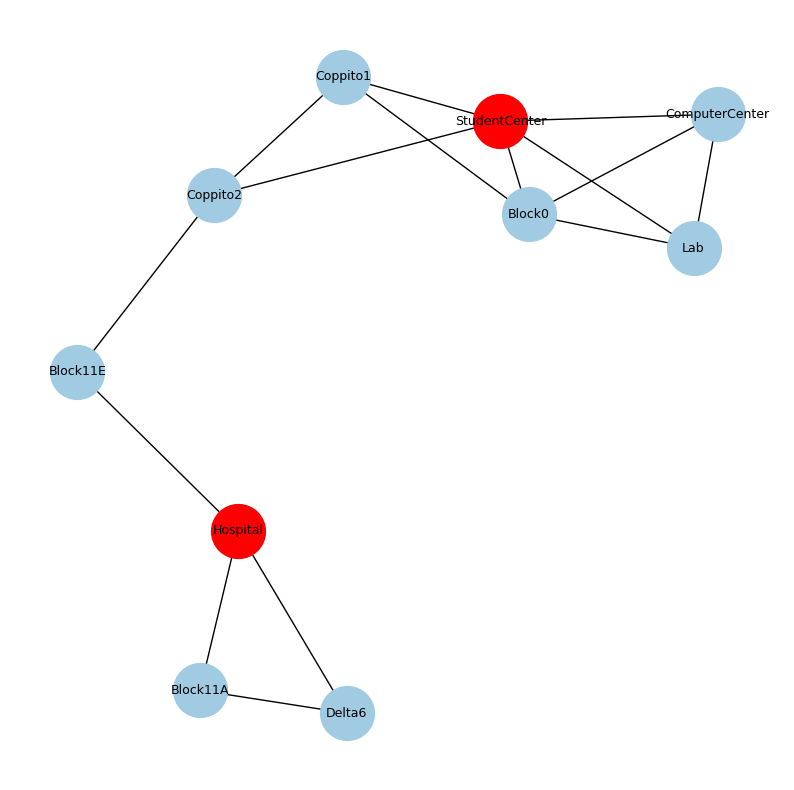

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


nx.draw(G,
        pos,
        ax,
        node_color='#A0CBE2',
        width=1,
        node_size=1500,
        with_labels=True,
        font_size=9,
        font_color='k')


nx.draw_networkx_nodes(G, pos, nodelist=activated, node_size=1500, node_color ='r')

plt.show()